In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Settings & Data Loading ---
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 6)

RAW_PATH = "../data/raw"

print("⏳ Loading data...")
# Loading only train and styores to save memory initially
df_train = pd.read_csv(os.path.join(RAW_PATH, "train.csv"))
df_stores = pd.read_csv(os.path.join(RAW_PATH, "stores.csv"))

# Convert date immediately to datetime 
df_train['date'] = pd.to_datetime(df_train['date'])

print(f"✅ Data loaded. Train shape: {df_train.shape}")
print(f"📅 Time range: {df_train['date'].min()} to {df_train['date'].max()}")

⏳ Loading data...
✅ Data loaded. Train shape: (3000888, 6)
📅 Time range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00


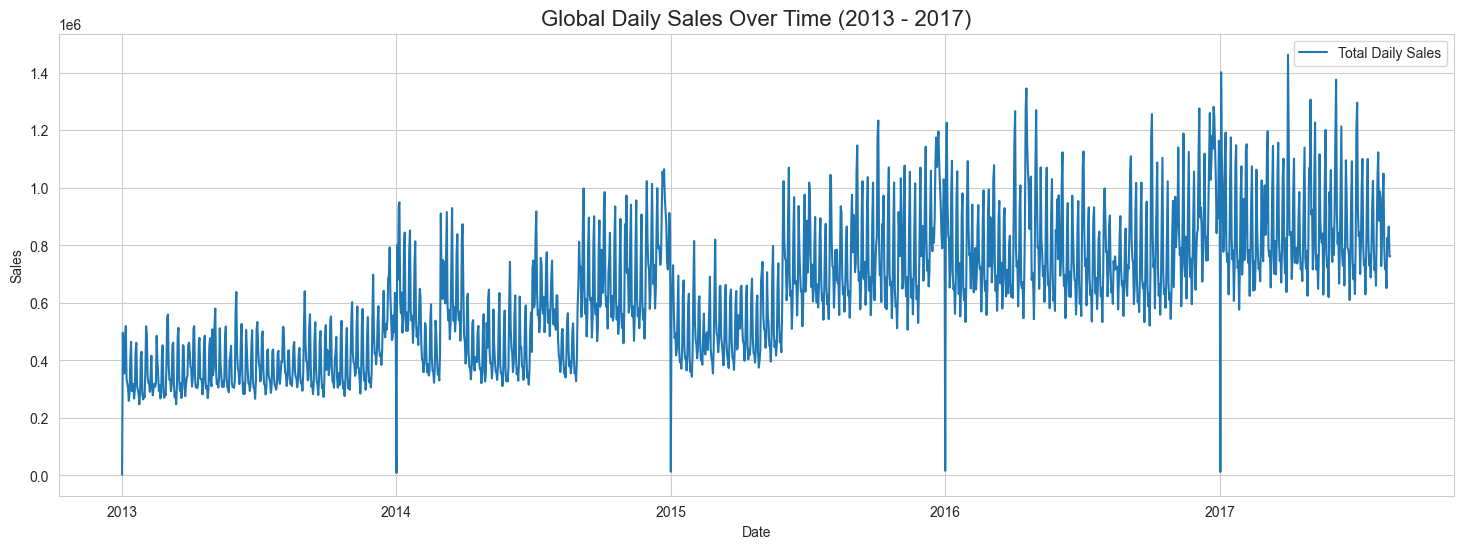

In [4]:
# --- 2. Target Variable Analysis (Sales) ---

# Aggregating total daily sales across ALL stores to see the global trend
daily_sales = df_train.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(18, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], color='#1f77b4', label='Total Daily Sales')
plt.title("Global Daily Sales Over Time (2013 - 2017)", fontsize=16)
plt.ylabel("Sales")
plt.xlabel("Date")
plt.legend()
plt.show()

C:\Users\konta\AppData\Local\Temp\ipykernel_17456\275263689.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_pattern, x='day_of_week', y='sales', palette='viridis')


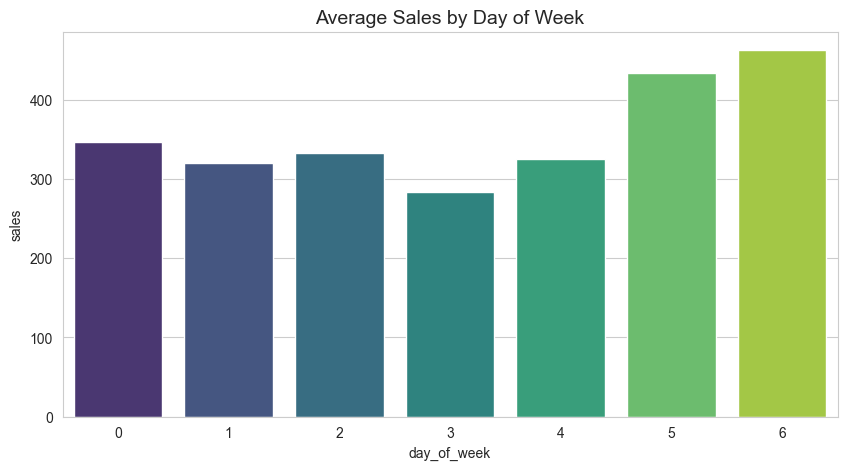

In [ ]:
# --- 3. Seasonality Check: Day of Week ---
# We want to know: Do people buy more on weekends?
df_train['day_of_week'] = df_train['date'].dt.dayofweek
df_train['day_idx'] = df_train['date'].dt.dayofweek # 0=Monday, 6=Sunday

# Group by day name and calculate average sales
weekly_pattern = df_train.groupby(['day_of_week', 'day_idx'])['sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=weekly_pattern, x='day_of_week', y='sales', palette='viridis')
plt.title("Average Sales by Day of Week", fontsize=14)
plt.show()

🔢 Correlation between Sales and Promotions: 0.4279


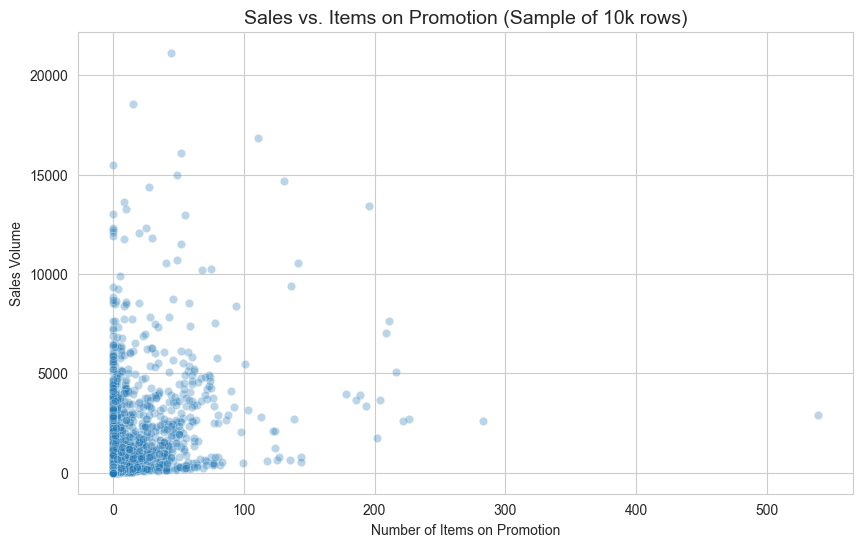

In [7]:
# --- 4. Impact of Promotions ---
# Hypothesis: More promotions = Higher sales
# Let's check the correlation
correlation = df_train[['sales', 'onpromotion']].corr().iloc[0, 1]
print(f"🔢 Correlation between Sales and Promotions: {correlation:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train.sample(10000, random_state=42), x='onpromotion', y='sales', alpha=0.3)
plt.title("Sales vs. Items on Promotion (Sample of 10k rows)", fontsize=14)
plt.xlabel("Number of Items on Promotion")
plt.ylabel("Sales Volume")
plt.show()